In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
#menghubungkan dengan colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv ("/content/drive/MyDrive/Praktikum_ML/praktikum07/data/apples_and_oranges.csv")
df.head()

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange


In [ ]:
df.describe()

,Weight,Size
count,40.000000,40.000000
mean,70.200000,4.922750
std,3.039906,0.590063
min,65.000000,4.010000
25%,68.000000,4.360000
50%,70.000000,4.930000
75%,73.000000,5.472500
max,75.000000,5.850000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  40 non-null     int64  
 1   Size    40 non-null     float64
 2   Class   40 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ KB


In [ ]:
#cek missing value
df.isnull().sum()

,0
Weight,0
Size,0
Class,0


In [ ]:
#cek nilai unik
df['Class'].unique()

array(['orange', 'apple'], dtype=object)

In [ ]:
df['Class'].value_counts()

,count
Class,
orange,20
apple,20


In [ ]:
X = df[['Weight', 'Size']]

#kolom target (label)
y = df['Class']

In [ ]:
X.head()

,Weight,Size
0,69,4.39
1,69,4.21
2,65,4.09
3,72,5.85
4,67,4.70


In [ ]:
y.head()

,Class
0,orange
1,orange
2,orange
3,apple
4,orange


In [ ]:
#split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Jumlah data training: {len(X_train)}")
print(f"Jumlah data testing: {len(X_test)}")

Jumlah data training: 32
Jumlah data testing: 8


In [ ]:
#Membuat model SVM dengan kernel linear
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = model.predict(X_test)
#Akurasi
print(f"Akurasi: {accuracy_score(y_test, y_pred) * 100:.2f}%")
#Laporan klasifikasi
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))
#Matriks kebingungan
print("\nMatriks Kebingungan:\n", confusion_matrix(y_test, y_pred))

Akurasi: 100.00%

Laporan Klasifikasi:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00         3
      orange       1.00      1.00      1.00         5

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8


Matriks Kebingungan:
 [[3 0]
 [0 5]]



Confusion Matrix:
 [[3 0]
 [0 5]]


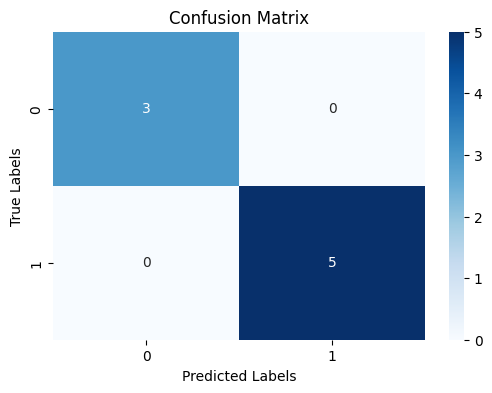

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

#buat confusion matrix
cm = confusion_matrix(y_test, y_pred)

#jika kamu tahu nama kelas (opsional, agar lebih informatif)
#misalnya: class_names = ['Negatif', 'Positif']
#maka tambahkan ke heatmap di bagian "xticklabels" dan "yticklabels"

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

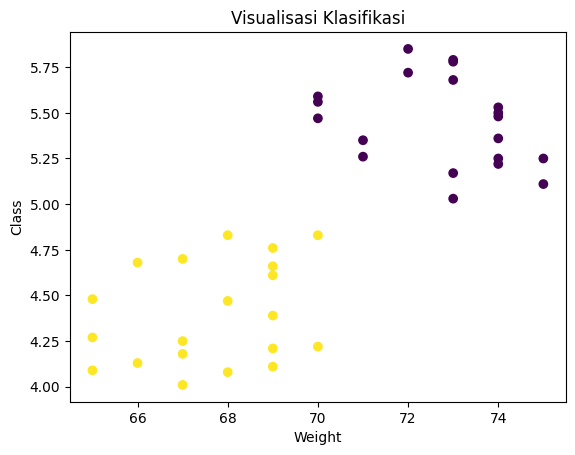

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['Weight'], df['Size'], c=df['Class'].astype('category').cat.codes)
plt.xlabel('Weight')
plt.ylabel('Class')
plt.title('Visualisasi Klasifikasi')
plt.show()

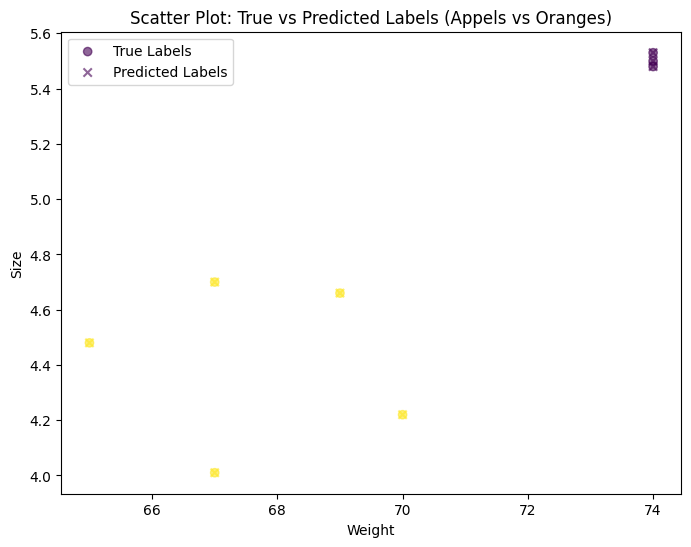

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder # Corrected import


# Re encode y_test for plotting
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
y_pred_encoded = le.transform(y_pred)

plt.figure(figsize=(8, 6)) # Corrected typo

# Plot titik berdasarkan Label Asli
plt.scatter(X_test['Weight'], X_test['Size'], c=y_test_encoded, cmap='viridis', marker='o', label='True Labels', alpha=0.6) # Use X_test for both axes

#plot titik berdasarkan label hasil prediksi
plt.scatter(X_test['Weight'], X_test['Size'], c=y_pred_encoded, cmap='viridis', marker='x', label='Predicted Labels', alpha=0.6) # Use X_test for both axes


plt.title('Scatter Plot: True vs Predicted Labels (Appels vs Oranges)')
plt.xlabel('Weight')
plt.ylabel('Size')
plt.legend()
plt.show()

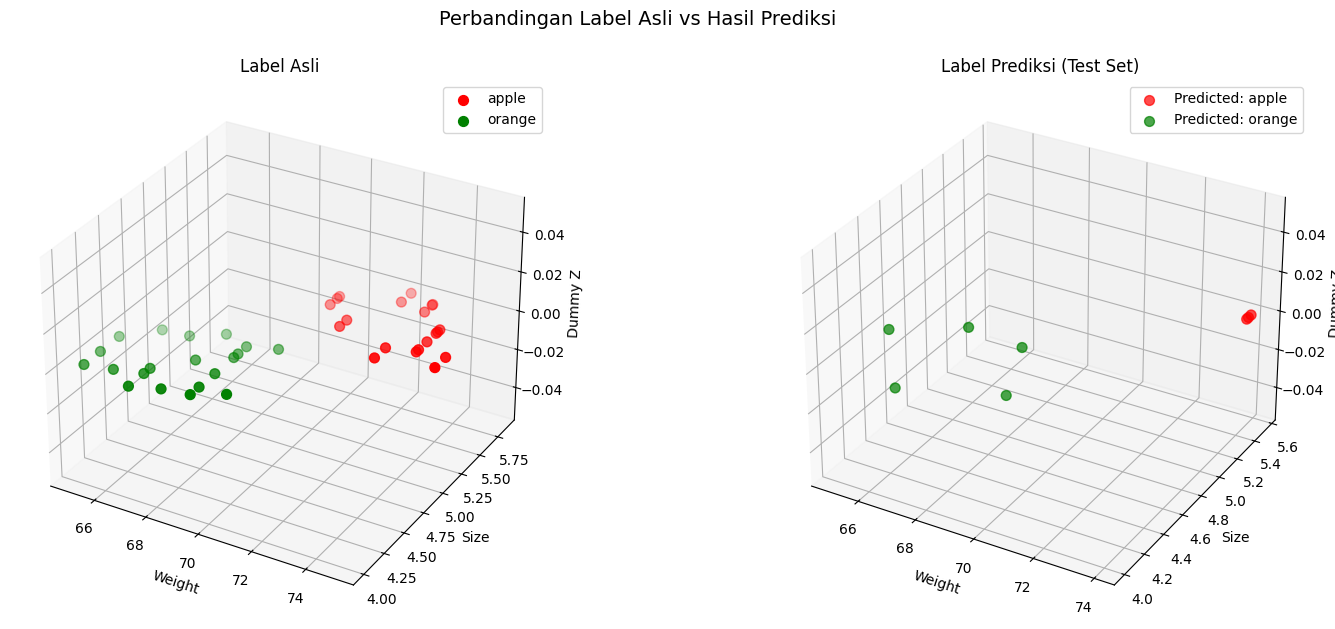

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np # Import numpy

# 3. encode label (ubah teks jadi angka)
le = LabelEncoder()
df['ClassEncoded'] = le.fit_transform(df['Class'])

#warna untuk tiap kelas
colors = ['r', 'g'] # Only two classes: orange and apple
labels = le.classes_

fig = plt.figure(figsize=(18, 7)) # Corrected variable name

#plot 1: Label Asli
ax1 = fig.add_subplot(121, projection='3d') # Corrected variable name
for i, species in enumerate(labels):
    subset = df[df['ClassEncoded'] == i]
    ax1.scatter(
        subset['Weight'],
        subset['Size'],
        np.zeros_like(subset['Weight']), # Use a dummy z-axis since we only have 2 features
        color=colors[i],
        label=species,
        s=50
    )

ax1.set_title('Label Asli')
ax1.set_xlabel('Weight')
ax1.set_ylabel('Size')
ax1.set_zlabel('Dummy Z') # Label for the dummy z-axis
ax1.legend()

#plot 2: label prediksi
ax2 = fig.add_subplot(122, projection='3d') # Corrected variable name

# Create a DataFrame for the test set with predicted labels
test_df = df.loc[X_test.index].copy() # Use .copy() to avoid SettingWithCopyWarning
test_df['Predicted'] = y_pred

# Encode predicted labels
test_df['PredictedEncoded'] = le.transform(test_df['Predicted'])


#visualisasi 3d berdasarkan hasil prediksi
#plot tiap spesies dengan warna berbeda based on predicted label
for i, species_labels in enumerate(labels):
    subset = test_df[test_df['PredictedEncoded'] == i]

    ax2.scatter(
        subset['Weight'],
        subset['Size'],
        np.zeros_like(subset['Weight']), # Use a dummy z-axis for consistency
        color=colors[i],
        label=f"Predicted: {species_labels}",
        s=50,
        alpha=0.7
    )

ax2.set_xlabel('Weight')
ax2.set_ylabel('Size')
ax2.set_zlabel('Dummy Z') # Label for the dummy z-axis
ax2.set_title('Label Prediksi (Test Set)')
ax2.legend()

plt.suptitle('Perbandingan Label Asli vs Hasil Prediksi', fontsize=14)
plt.show()